<a href="https://colab.research.google.com/github/codewithpradeep14/Minor_course_projects_and_labs/blob/main/Mod3_lab1_pradeep.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

FOUNDATIONS OF MODERN MACHINE LEARNING, IIIT Hyderabad

MODULE 3: CLASSIFICATION-1

LAB-1 : Understanding Distance metrics and Introduction to KNN

Name:- Pradeep Sahu

In [1]:
# Importing Required Libraries
import numpy as np
import pandas as pd
import math
from scipy.spatial import distance
import matplotlib.pyplot as plt

In [2]:
# Simple 2D example
x_1 = np.array((1, 2))
x_2 = np.array((4, 6))

In [3]:
# Naive approach to calculating Euclidean distance (not-vectorized)
sumv = 0
for i in range(len(x_1)):
  sumv += ((x_1[i]-x_2[i])**2)
dist = math.sqrt(sumv)
print(dist)

5.0


In [5]:
# Libraries such as SciPy provide functions to compute different kinds of distance metrics between points
euclidean_dist = distance.euclidean(x_1, x_2)
print(euclidean_dist)

5.0


In [4]:
# 3-D Visualization
plotx = np.linspace(-10,10,50)
meshx, meshy = np.meshgrid(plotx,plotx)

In [6]:
tempeuclid = np.sqrt((meshx**2 + meshy**2))

In [7]:
import plotly.graph_objects as go

fig = go.Figure(data=[go.Surface(z=tempeuclid, x=plotx, y=plotx)])
fig.update_layout(title='Euclidean Distance from origin', autosize=False,
                  width=1000, height=1000,
                  margin=dict(l=65, r=50, b=65, t=90))
fig.show()

In [9]:
# Libraries such as SciPy provide functions to compute different kinds of distance metrics between points
# x_1 = np.array((1, 2))
# x_2 = np.array((4, 6))
manhattan_dist = distance.cityblock(x_1, x_2)
print(manhattan_dist)

7


In [8]:
# 3-D visualization
plotx = np.linspace(-10,10,50)
meshx, meshy = np.meshgrid(plotx,plotx)

In [10]:
tempmanhattan = np.abs(meshx) + np.abs(meshy)
import plotly.graph_objects as go

fig = go.Figure(data=[go.Surface(z=tempmanhattan, x=plotx, y=plotx)])
fig.update_layout(title='Manhattan Distance from origin', autosize=False,
                  width=1000, height=1000,
                  margin=dict(l=65, r=50, b=65, t=90))
fig.show()

In [11]:
# x_1 = np.array((1, 2))
# x_2 = np.array((4, 6))
minkowski_distance = distance.minkowski(x_1, x_2, p=3)
print("Minkowski distance when p=3 is ",minkowski_distance)

Minkowski distance when p=3 is  4.497941445275415


In [12]:
# You can verify that this distance is the same as Manhattan dist when p=1,
# and Euclidean dist when p=2

minkowski_dist_p1 = distance.minkowski(x_1,x_2,p=1)
print("Minkowski distance when p=1 is ",minkowski_dist_p1)
minkowski_dist_p2 = distance.minkowski(x_1,x_2,p=2)
print("Minkowski distance when p=2 is ",minkowski_dist_p2)

Minkowski distance when p=1 is  7.0
Minkowski distance when p=2 is  5.0


In [13]:
str_1 = 'euclidean'
str_2 = 'manhattan'
hamming_dist = distance.hamming(list(str_1), list(str_2)) * len(str_1)
print(hamming_dist)

# Note that the answer will be 7, as except for the last two letters ('a' and 'n'), all
# the other corresponding letters in the two strings are different.

7.0


In [14]:
from numpy.linalg import norm

# x_1 = np.array((1, 2))
# x_2 = np.array((4, 6))

cosine_similarity = 1 - distance.cosine(x_1,x_2)
print(cosine_similarity)

cosine_similarity = np.dot(x_1, x_2)/(norm(x_1)*norm(x_2))
print(cosine_similarity)

0.9922778767136677
0.9922778767136677


In [15]:
# x_1 = np.array((1, 2))
# x_2 = np.array((4, 6))

chebyshev_distance = distance.chebyshev(x_1,x_2)
print(chebyshev_distance)

4


In [16]:
## In the context of binary vectors, let's say:
## a = no. of indices where vector1[i] == 1 == vector2[i]
## b = no. of indices where vector1[i] == 0 and vector2[i] == 1
## c = no. of indices where vector1[i] == 1 and vector2[i] == 0
## d = no. of indices where vector1[i] == 0 == vector2[i]
## Jaccard-distance = 1 - [a/(a+b+c)]

print(distance.jaccard([1, 0, 0], [0, 1, 0]))
print(distance.jaccard([1, 0, 0], [1, 1, 0]))
print(distance.jaccard([1, 0, 0], [1, 1, 1]))

1.0
0.5
0.6666666666666666


In [17]:
def jaccard_similarity(a, b):
    c = a.intersection(b)
    return float(len(c)) / (len(a) + len(b) - len(c))

list1 = ['dog', 'cat', 'rat']
list2 = ['dog', 'cat', 'mouse', 'rabbit']
# The intersection is ['dog', 'cat']
# union is ['dog', 'cat', 'rat', 'mouse, 'rabbit']
words1 = set(list1)
words2 = set(list2)
print("Jaccard similarity is :",jaccard_similarity(words1, words2))
print("Jaccard distance is :", 1-jaccard_similarity(words1, words2))

Jaccard similarity is : 0.4
Jaccard distance is : 0.6


In [18]:
import random
import scipy.stats as ss
from sklearn.neighbors import KNeighborsClassifier

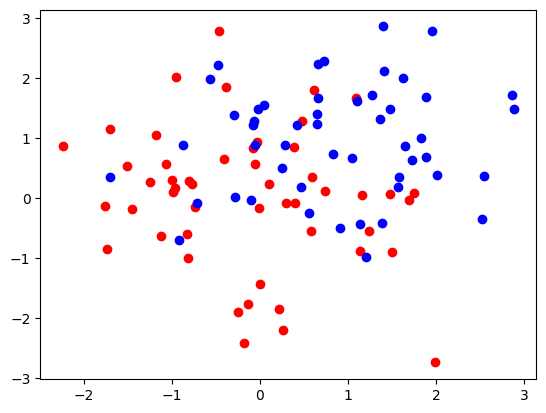

In [19]:
def generate_synth_data(n = 50):
    points = np.concatenate((ss.norm(0, 1).rvs((n, 2)), ss.norm(1, 1).rvs((n, 2))), axis = 0)
    outcomes = np.concatenate((np.repeat(0, n), np.repeat(1, n)))
    return (points, outcomes)

n = 50
pts,tgts = generate_synth_data(n) #generates 100 points
# print(tgts)
plt.figure()
plt.plot(pts[:n, 0], pts[:n, 1], "ro")
plt.plot(pts[n:, 0], pts[n:, 1], "bo")
plt.show()

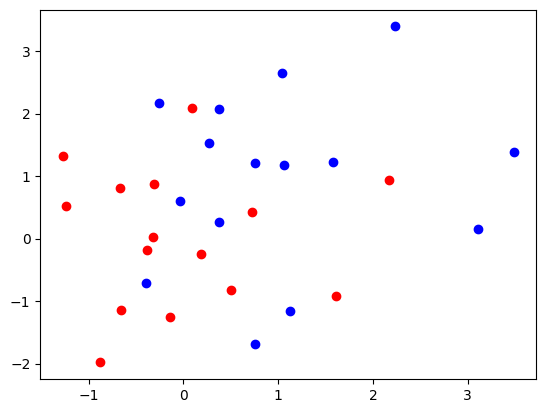

In [20]:
n = 15
test_pts,test_tgts = generate_synth_data(n)
# print(test_tgts)
plt.figure()
plt.plot(test_pts[:n, 0], test_pts[:n, 1], "ro")
plt.plot(test_pts[n:, 0], test_pts[n:, 1], "bo")
plt.show()

In [21]:
## TASK - 3
## The code given below is that of a KNN classifier, provided by Scikit-learn.
## The parameter 'metric' includes various distance metric options, including those
## we learnt above- manhattan, euclidean, minkowski,chebyshev, hamming, etc.

## Try out different metrics and observe changes in the accuracy, if any. Don't change value of 'k'
## Also, experiment with different metrics and observe if they are applicable for this kind of data.
## If there are any additional parameters needed, for instance, 'p' in case of Minkowski distance, include them.

knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(pts, tgts)
our_predictions = knn.predict(test_pts)
print("Prediction Accuracy: ")
print(100 * np.mean(our_predictions == test_tgts))

Prediction Accuracy: 
66.66666666666666


In [22]:
from sklearn.datasets import load_iris
iris = load_iris()
data = pd.DataFrame(iris.data, columns=iris.feature_names)
# data['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)
data['target'] = pd.Series(iris.target)
data.head(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0
6,4.6,3.4,1.4,0.3,0
7,5.0,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,0
9,4.9,3.1,1.5,0.1,0


In [23]:
np.random.seed(123)
indices = np.random.permutation(data.shape[0])
div = int(0.65 * len(indices))
train_idx, test_idx = indices[:div], indices[div:]

train_set, test_set = data.loc[train_idx,:], data.loc[test_idx,:]
test_class = list(test_set.iloc[:,-1])
train_class = list(train_set.iloc[:,-1])

In [24]:
def dist_euclidean(X1,X2):
    return distance.euclidean(X1,X2)

def dist_cosine(X1,X2):
    return distance.cosine(X1,X2)

def dist_manhattan(X1,X2):
    return distance.cityblock(X1,X2)

def dist_chebyshev(X1,X2):
    return distance.chebyshev(X1,X2)

In [25]:
metrics_list = [dist_euclidean,dist_cosine, dist_manhattan, dist_chebyshev]
for dist_metric in metrics_list:
  knn = KNeighborsClassifier(n_neighbors = 3, metric=dist_metric)
  knn.fit(train_set, train_class)
  our_predictions = knn.predict(test_set)
  print(dist_metric.__name__)
  print("Prediction Accuracy: ")
  print(100 * np.mean(our_predictions == test_class))
  print()

dist_euclidean
Prediction Accuracy: 
100.0

dist_cosine
Prediction Accuracy: 
100.0

dist_manhattan
Prediction Accuracy: 
100.0

dist_chebyshev
Prediction Accuracy: 
100.0



Questions to Think About and Answer:

1. How are similarity and distance different from each other?

ANS:- Distance:-
Distance is a numerical measurement of how far apart two points are in a given space. It is typically a non-negative value that quantifies the dissimilarity between two data points. Various distance metrics, such as Euclidean distance, Manhattan distance, and Minkowski distance, are commonly used to calculate the dissimilarity or distance between points in a dataset. These metrics provide a way to measure the separation between data points in a multi-dimensional space.

Similarity:-
Similarity, on the other hand, measures how alike or related two data points are to each other. It is a measure of how much two points resemble each other, often represented as a value between 0 and 1, where 1 indicates complete similarity and 0 indicates no similarity. Various similarity measures, such as cosine similarity, Jaccard similarity, and Pearson correlation coefficient, are used to quantify the resemblance or likeness between data points.

If we see in  the K-Nearest Neighbors (KNN) algorithm:

The KNN algorithm utilizes the concept of distance to identify the K nearest data points to a given query point. It calculates the distance between the query point and all other points in the dataset, then selects the K nearest neighbors based on the calculated distances.
The similarity between data points can also be used in conjunction with the KNN algorithm, especially when dealing with similarity-based measures such as cosine similarity or correlation coefficients. In this case, the KNN algorithm aims to find the K most similar data points to the query point.


2. Are there any conditions for a particular distance to be considered a "distance metric"?

ANS:- Yes, there are specific conditions that a function must satisfy to be considered a "distance metric." These conditions ensure that the function accurately represents a valid distance measure between points in a space.


1. Non-negativity: The distance between any two points must be a non-negative real number. Formally, for any two points x and y in the space , the distance
d(x,y) is non negative , d(x,y)≥ 0 , and d(x,y)=0 if and only if x=y.

2. Identity of indiscernibles: The distance between two distinct points should be zero only if the points are the same. Formally, for any two points
x and y in the space, if d(x,y)=0, then x=y.

3. Symmetry: The distance from x to y is the same as the distance from y to x .Formally, for any two points x and y in the space, d(x,y) = d(y,x).

4. riangle inequality: The distance between two points via any intermediate point should be less than or equal to the sum of the distances between the two points directly. Formally, for any three points x,y and z in the space,
d(x,z) ≤ d(x,y)+d(y,z).

